
# Visualizing a graph

This example notebook focusses on the different visualization options autodepgraph supports. 
For use in an experimental context a good visualization of the current state of the graph is important. However, at the same time the required dependencies can be a bit problematic or messy. For this reason several plotting options exist: 

- Plotting using graphviz and pyqtgraph 
    - default option. 
    - positioning using the graphviz dot layout for directed graphs
    - updates in real-time 
- Plotting using matplotlib 
    - rudimentary plot (live update note supported from a notebook)
    - positioning using the spring layout (does not require graphviz) 
    
- Plotting using hmtl 
    - uses pygraphviz to generate a dotfile and convert it to svg 
    - a live updating html page ensures the last version of the svg is shown
- Writting to a dot file
    - Useful when you want to use your own library for plotting
    - Color denoting the state of nodes not supported yet 
- Disabling plotting
    - For performance users


The plotting mode can be controlled using the parameter `graph.cfg_plot_mode`


In [1]:
from importlib import reload
import os
import autodepgraph as adg
from autodepgraph.graph import Graph
import matplotlib.pyplot as plt
%matplotlib inline


/Users/Adriaan/GitHubRepos/DiCarloLab_Repositories/AutoDepGraph/autodepgraph


We start by creating a very basic graph 

In [2]:
test_graph = Graph('test_graph')
test_graph.add_node('A')
test_graph.add_node('B')
test_graph.add_node('C')
test_graph.add_node('D')
test_graph.add_node('E')

test_graph.E.parents(['D', 'C'])
test_graph.D.parents(['B'])
test_graph.C.parents(['A', 'B'])
test_graph.B.parents(['A'])

In [3]:
for node in [test_graph.A, test_graph.B, test_graph.C]:
    # ensures we always walk back the entire tree, creates interesting visualizaiton
    node.check_function('always_needs_calibration')
    node.calibrate_function('test_calibration_True_delayed')
    node.state('needs calibration')

### pyqtgraph visualization 

In [4]:
test_graph.cfg_plot_mode('pyqtgraph')
test_graph.B() # call Node E 

Executing node "B".
Executing node "A".
	Calibrating node A.
	Calibration of node A successful: True
	Calibrating node B.
	Calibration of node B successful: True


'good'

### matplotlib visualization 

In [6]:
test_graph.clear_node_state()
for node in test_graph.nodes.values():
    node.state('needs calibration')

Executing node "C".
	Calibrating node C.
	Calibration of node C successful: True


'good'

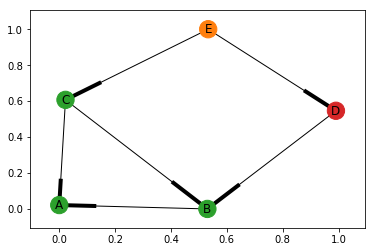

In [8]:
test_graph.cfg_plot_mode('matplotlib')
test_graph.C() # call Node E 

## HTML visualization

The html visualization uses a simple html file that auto updates an html file at a specific location. 
Opening this html file in the browser will open a liver view of the graph.
The file is located in `autodepgraph/svg_viewer/svg_graph_viewer_html` and looks for a file located next to it. 
This filepath for the svg file is configurable through the parameter `cfg_svg_filename`. 

In [10]:
# The svg file get's stored here 
test_graph.cfg_svg_filename()

'/Users/Adriaan/GitHubRepos/DiCarloLab_Repositories/AutoDepGraph/autodepgraph/svg_viewer/adg_graph.svg'

In [12]:
test_graph.cfg_plot_mode('html')
test_graph.clear_node_state()
for node in test_graph.nodes.values():
    node.state('needs calibration')
test_graph.C()

Executing node "C".
Executing node "A".
	Calibrating node A.
	Calibration of node A successful: True
Executing node "B".
	Calibrating node B.
	Calibration of node B successful: True
	Calibrating node C.
	Calibration of node C successful: True


'good'

## Writing to a dotfile
If you write your own visualization for dotfiles (or have a better tool than my html viewer) you can also configure autodepgraph to only write a dotfile. 

In [13]:

test_graph.cfg_plot_mode('dotfile')
test_graph.clear_node_state()
for node in test_graph.nodes.values():
    node.state('needs calibration')
test_graph.C()

Executing node "C".
Executing node "A".
	Calibrating node A.
	Calibration of node A successful: True
Executing node "B".
	Calibrating node B.
	Calibration of node B successful: True
	Calibrating node C.
	Calibration of node C successful: True


'good'

## No visualization

In [15]:
test_graph.cfg_plot_mode('None')
test_graph.C() # call Node E 

Executing node "C".
	Checking node C.
	Needs C calibration: True
	Node C broken: False
	Calibrating node C.
	Calibration of node C successful: True


'good'

### The monitor can also be updated by hand

test_graph.update_monitor()

## Finally we load a slightly more complex graph and see how it behaves

In [17]:
test_dir = os.path.join(adg.__path__[0], 'tests', 'test_data')
fn = os.path.join(test_dir, 'rabi_sims_example_graph.yaml')
rmg = Graph('Rabi_model_graph')
rmg.load_graph(fn)

In [18]:
rmg.cfg_plot_mode('html')

In [22]:

rmg.update_monitor()
rmg.clear_node_state()
for node in rmg.nodes.values():
    node.state('needs calibration')
rmg.update_monitor()

rmg.Rabi_simulation()

Executing node "Rabi_simulation".
Executing node "Wigner_tomography".
Executing node "Photon_meter".
Executing node "Trotter_chevron".
Executing node "Chevron_amp".
Executing node "High_fidelity_single_qubit_gates".
Executing node "Amplitude_fine".
Executing node "Motzoi".
Executing node "Amplitude_coarse".
Executing node "frequency_spec".
	Calibrating node frequency_spec.
	Calibration of node frequency_spec successful: True
Executing node "mixer_offset".
	Calibrating node mixer_offset.
	Calibration of node mixer_offset successful: True
Executing node "mixer_skewness".
	Calibrating node mixer_skewness.
	Calibration of node mixer_skewness successful: True
	Calibrating node Amplitude_coarse.
	Calibration of node Amplitude_coarse successful: True
Executing node "frequency_ramsey".
Executing node "SSRO".
	Calibrating node SSRO.
	Calibration of node SSRO successful: True
	Calibrating node frequency_ramsey.
	Calibration of node frequency_ramsey successful: True
	Calibrating node Motzoi.
	Cal

'good'